In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

**We can use Decision Tree and do selection**

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
# this function is defined to make use of different selection types like,
# Forward, Backward, Step Wise (Sequence Forward)
# This function is used for Decision Tree model only
# Here the inputs are the predictor space X , target variable y,
# max_cols - maximum number of columns that are being iterated through
# another feature range_of_cols which can be excerised when we want to use a single column

# Here a line plot is plotted at the end when a range of values are given
# Here a scatter plot is plotted at the end when a single value is given

def selection_mech_dtree (X,y, max_cols = 0, range_of_cols = True):
    
    if range_of_cols == False:
        
        range_values = range(max_cols,max_cols+1)
    
    else:
        range_values = range(1,max_cols+1)
    
    # a list of combination are defined along with the selection and color with which it needs to be displayed.
    sel_comb = [(True,False,'Fro','black'),(True,True,'Seq_Fro','blue'),
                (False,False,'Back','red')]

    plt.figure()
    
    # a loop is being run for each selection
    for for_flag,flo_flag,selection,color_line in sel_comb:

        list_n_col = []
        list_k_score = []
        
        # a loop is being run through each number of feature
        for i in range_values:
            
            # using forward and floating the selections are altered
            sfs = SFS(DecisionTreeRegressor(),
                      k_features=i,
                      forward=for_flag,
                      floating=flo_flag,
                      scoring = 'r2',
                      cv = 10)

            sfs.fit(X, y)
            
            # Appending the resultant values
            list_n_col.append(selection)
            list_k_score.append(sfs.k_score_)
         
        # Plotting the values   
        if range_of_cols == False:
            
            plt.scatter(list_n_col,list_k_score, label = selection, color = color_line, alpha=0.4)
        
            plt.xticks(ticks= range_values)
        
        else:
            plt.plot(list_n_col,list_k_score, label = selection, color = color_line, alpha=0.4)

        

    plt.legend()    

    plt.show()

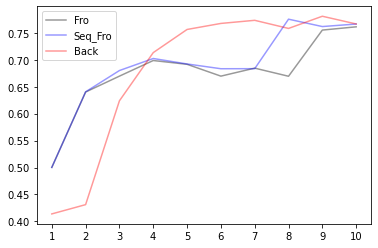

In [102]:
selection_mech_dtree(X,y,10)

# When the function is invoked, we could see that there all the selection varies result but could
# they are peaking at number of columns at 8 for Squence Forward

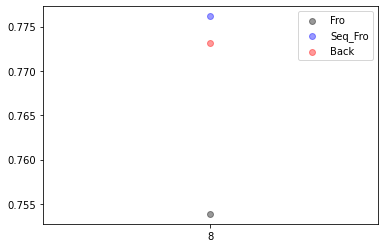

In [101]:
# The function is invoked, for visualizing the peaked value
selection_mech_dtree(X,y,8,False)

In [105]:
# Using Sequence Forward alias Step Selection with 8 features
sfs = SFS(DecisionTreeRegressor(),
                      k_features= 8,
                      forward=True,
                      floating=True,
                      scoring = 'r2',
                      cv = 10)

sfs.fit(X, y)
print('The Selected Features: ',sfs.k_feature_names_)

print('The Final Score: ',sfs.k_score_)

The Selected Features:  ('bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'lat', 'long')
The Final Score:  0.7774606442752187


**Selection - Using Transformed Data**

In [94]:
trans_data = data.copy()

In [95]:
# to bring into same scale, it is change into radians
trans_data['lat'] = np.radians(trans_data['lat'])
trans_data['long'] = np.radians(trans_data['long'])

**String Date Time to Ordinal**

In [96]:
# Converting the date to ordinal value and feeding it into the selection

trans_data['date'] = pd.to_datetime(trans_data['date'])

trans_data['date']=trans_data['date'].map(dt.datetime.toordinal)`

**Seasonality Check**

<AxesSubplot:xlabel='month', ylabel='price'>

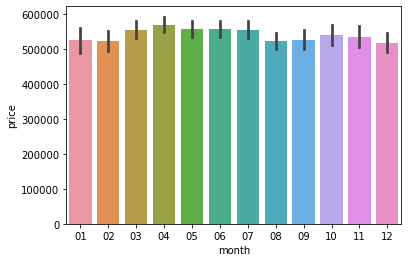

In [41]:
data_with_month = pd.DataFrame()
data_with_month['month'] = data['date'].apply(lambda x:x[4:6]).sort_values()


sns.barplot(x = data_with_month['month'], y = data['price'])

# Couldnt find any seasonality affect on months

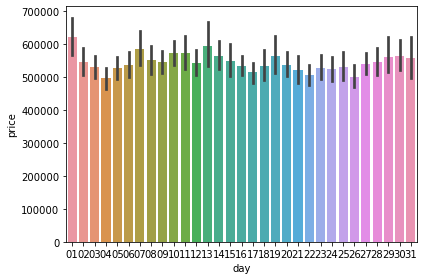

In [27]:
data_with_day = pd.DataFrame()
data_with_day['day'] = data['date'].apply(lambda x:x[6:8]).sort_values()

sns.barplot(x = data_with_day['day'], y = data['price'])

plt.tight_layout()

# Couldnt find any seasonality affect on days of the month sold

In [97]:
# there is no seasonality we can remove the date field
# Also we can drop id
trans_data.drop(columns= ['date','id'], axis =1, inplace= True)

**One Hot Encoding for zipcodes**

In [93]:
one_hot_zip = pd.get_dummies(data.zipcode, drop_first=True)

In [98]:
# Removing Zipcode as one hot encoding is done

trans_data.drop(columns= ['zipcode'], axis =1, inplace= True)

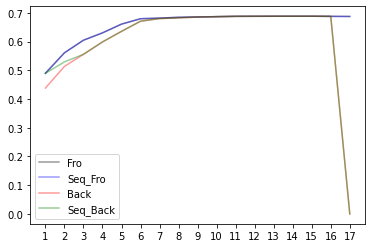

In [75]:
X = trans_data.drop(columns=['price'], axis=1)

y = trans_data['price']

selection_mech(X,y,17)

# When the function is invoked, we could see that all the selection at peaking at columns at 6

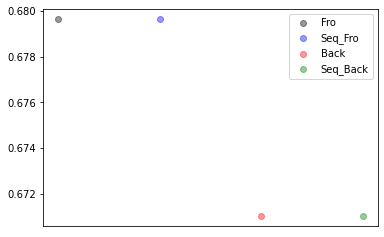

In [100]:
X = trans_data.drop(columns=['price'], axis=1)

y = trans_data['price']

# The function is invoked, for visualizing the peaked value
selection_mech(X,y,6,False)

In [106]:
# As for data it is again peaking a 6, so using Seq selection 
X = trans_data.drop(columns=['price'], axis=1)

y = trans_data['price']

sfs = SFS(LinearRegression(),
                      k_features= 6,
                      forward=True,
                      floating=False,
                      scoring = 'r2',
                      cv = 10)

sfs.fit(X, y)
print('The Selected Features: ',sfs.k_feature_names_)

print('The Final Score: ',sfs.k_score_)

# the scores have marginally changed after transformation

The Selected Features:  ('sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'lat')
The Final Score:  0.6796561506553618


In [92]:
X = trans_data.drop(columns=['price'], axis=1)

y = trans_data['price']

sfs = SFS(DecisionTreeRegressor(),
                      k_features=6,
                      forward=True,
                      floating=True,
                      scoring = 'r2',
                      cv = 10)

sfs.fit(X, y)
print('The Selected Features: ',sfs.k_feature_names_)

print('The Final Score: ',sfs.k_score_)

# The decision tree is not working well will transformed data

The Selected Features:  ('waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'lat')
The Final Score:  0.5516722183882972


**Model fitting step 3 - So, we will be selecting feature using the knowledge gained by feature engineering and EDA**

 These are the features - 'bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long'

In [299]:
X_train_1 = data[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]
y_train_1 = data['price']

In [336]:
d_tree = DecisionTreeRegressor()

# Using Cross Validation to train and test on the train data with the selected features
trans_rmse_scores = cross_val_score(d_tree, X_train_1,y_train_1,cv=10, scoring = "neg_root_mean_squared_error")
trans_r2_scores = cross_val_score(d_tree, X_train_1,y_train_1, cv=10, scoring = "r2")


print('\nCross Validation')

print('RMSE: ',trans_rmse_scores.mean())
print('R2: ',trans_r2_scores.mean())


Cross Validation
RMSE:  -173833.85397640467
R2:  0.7848467214488644


**Testing with Test Data**

In [6]:
# test data is being read
data_test = pd.read_csv('wk3_kc_house_test_data.csv')

In [304]:
# Spliting  the test data
X_test_1 = data_test[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]

y_test_1 = data_test['price']

In [359]:
# using first the default Decision Tree Settings
d_tree = DecisionTreeRegressor()

d_tree = d_tree.fit(X_train_1,y_train_1)

y_pred = d_tree.predict(X_test_1)

print('R2:',r2_score(y_test_1,y_pred))

print('RMSE:',np.sqrt(mean_squared_error(y_test_1,y_pred)))

epsilon = np.finfo(np.float64).eps
mape = np.abs(y_pred - y_test_1) / np.maximum(np.abs(y_test_1), epsilon)
output_errors = np.average(mape,
                               weights=None, axis=0)

mape_final =np.average(output_errors, weights=None)

print('MAPE: ', mape_final*100)

R2: 0.7595336777097327
RMSE: 175721.19043155556
MAPE:  19.25504068165432


**Adding one hot encoded Zipcodes**

In [317]:
X_train_2 = data[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]

X_train_2 = pd.concat([X_train_,one_hot_zip],axis = 1)

y_train_2 = data['price']

In [338]:
d_tree = DecisionTreeRegressor()

# Using Cross Validation to train and test on the train data with the selected features
trans_rmse_scores = cross_val_score(d_tree, X_train_2,y_train_2,cv=10, scoring = "neg_root_mean_squared_error")
trans_r2_scores = cross_val_score(d_tree, X_train_2,y_train_2, cv=10, scoring = "r2")


print('\nCross Validation')

print('RMSE: ',trans_rmse_scores.mean())
print('R2: ',trans_r2_scores.mean())


Cross Validation
RMSE:  -180949.87819622125
R2:  0.7677349477010551


In [319]:
# Similarly adding one hot encoding for test data

X_test_2 = data_test[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]

one_hot_zip = pd.get_dummies(data_test.zipcode, drop_first=True)

X_test_2 = pd.concat([X_test_2,one_hot_zip],axis = 1)

y_test_2 = data_test['price']

In [355]:
# using first the default Decision Tree Settings
d_tree = DecisionTreeRegressor()

d_tree = d_tree.fit(X_train_2, y_train_2)

y_pred = d_tree.predict(X_test_2)

print('R2:',r2_score(y_test_2,y_pred))

print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

epsilon = np.finfo(np.float64).eps
mape = np.abs(y_pred - y_test_2) / np.maximum(np.abs(y_test_2), epsilon)
output_errors = np.average(mape,
                               weights=None, axis=0)

mape_final =np.average(output_errors, weights=None)

print('MAPE: ', mape_final*100)

R2: 0.7374087685804243
RMSE: 183627.2439663468
MAPE:  19.185052337571374


**Dropping ID's with Duplicate Entries**

In [160]:
df = data.groupby('id')['price'].count().sort_values(ascending = False)

In [161]:
id_with_mul_entries = list(df[df.values > 1].index)

In [163]:
# making a copy of the data
data_copy = data.copy()

In [164]:
# adding the check for present of multiple extries wuing the list of ids
data_copy['multi_sales'] = data_copy.id.apply(lambda x: True if x in id_with_mul_entries else False)

In [167]:
data_copy_2 = data_copy[data_copy.multi_sales ==False]

In [168]:
data_multi = data_copy[data_copy.multi_sales == True].copy()

data_multi = data_multi.sort_values('date')

data_multi.drop_duplicates(subset=['id'], inplace = True)

In [180]:
data_final = data_copy_2.append(data_multi)

In [172]:
data_multi = data_multi.sort_values('date')

In [177]:
data_multi.drop_duplicates(subset=['id'], inplace = True)

In [182]:
X_train_3 = data_final[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]
y_train_3 = data_final['price']

In [183]:
# Spliting  the test data
X_test_3 = data_test[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]

y_test_3 = data_test['price']

In [342]:
d_tree = DecisionTreeRegressor()

# Using Cross Validation to train and test on the train data with the selected features
trans_rmse_scores = cross_val_score(d_tree, X_train_3,y_train_3,cv=10, scoring = "neg_root_mean_squared_error")
trans_r2_scores = cross_val_score(d_tree, X_train_3,y_train_3, cv=10, scoring = "r2")


print('\nCross Validation')

print('RMSE: ',trans_rmse_scores.mean())
print('R2: ',trans_r2_scores.mean())


Cross Validation
RMSE:  -178221.4341707442
R2:  0.7620529921093843


In [353]:
# using first the default Decision Tree Settings
d_tree = DecisionTreeRegressor()

d_tree = d_tree.fit(X_train_3,y_train_3)

y_pred = d_tree.predict(X_test_3)

print('R2:',r2_score(y_test_3,y_pred))

print('RMSE:',np.sqrt(mean_squared_error(y_test_3,y_pred)))

epsilon = np.finfo(np.float64).eps
mape = np.abs(y_pred - y_test_3) / np.maximum(np.abs(y_test_3), epsilon)
output_errors = np.average(mape,
                               weights=None, axis=0)

mape_final =np.average(output_errors, weights=None)

print('MAPE: ', mape_final*100)

# Could see only a marginal change in the score

R2: 0.7480421955940313
RMSE: 179870.90248657798
MAPE:  19.664745177601283


**6.Model fitting step 3**

In [4]:
X_train_4 = data[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]
y_train_4 = data['price']

In [7]:
# Spliting  the test data
X_test_4 = data_test[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]

y_test_4 = data_test['price']

In [17]:
d_tree = DecisionTreeRegressor(min_samples_split= 15,min_samples_leaf=9, random_state= 20)

# Using Cross Validation to train and test on the train data with the selected features
trans_rmse_scores = cross_val_score(d_tree, X_train_4,y_train_4,cv=10, scoring = "neg_root_mean_squared_error")
trans_r2_scores = cross_val_score(d_tree, X_train_4,y_train_4, cv=10, scoring = "r2")


print('\nCross Validation')

print('RMSE: ',trans_rmse_scores.mean())
print('R2: ',trans_r2_scores.mean())


Cross Validation
RMSE:  -181469.84613660767
R2:  0.7664290171798692


In [19]:
## Decision tree plotting for the model
import graphviz
d_tree.fit(X_train_4, y_train_4)
dt_data = tree.export_graphviz(d_tree, max_depth=3, out_file=None, feature_names=X_train_4.columns, filled=True, rounded=True)
graph = graphviz.Source(dt_data)
graph.render("DT-d_tree")

'DT-d_tree.pdf'

In [352]:
d_tree = DecisionTreeRegressor(min_samples_split= 15,min_samples_leaf=9, random_state= 20)

d_tree = d_tree.fit(X_train_4,y_train_4)

y_pred = d_tree.predict(X_test_4)

print('R2:',r2_score(y_test_4,y_pred))

print('RMSE:',np.sqrt(mean_squared_error(y_test_4,y_pred)))

epsilon = np.finfo(np.float64).eps
mape = np.abs(y_pred - y_test_4) / np.maximum(np.abs(y_test_4), epsilon)
output_errors = np.average(mape,
                               weights=None, axis=0)

mape_final =np.average(output_errors, weights=None)

print('MAPE: ', mape_final*100)

R2: 0.8178701687035694
RMSE: 152928.19012099208
MAPE:  16.921645845915766


**DTree Model with GridSearchCV for best hyperparameters**

In [20]:
# importing GridsearchCv package from library
from sklearn.model_selection import GridSearchCV
from sklearn import tree
#train data
X_train_5 = data[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]
y_train_5 = data['price']

#parameters to be tuned 
parameters={'min_samples_split' : range(20,100,20),'max_depth': range(2,12,2)}

#GridSearch cross valition with CV=5 , the parameters to be tuned as above
clf_tree=tree.DecisionTreeRegressor()
clf=GridSearchCV(clf_tree,parameters,cv=5)
clf.fit(X_train_5,y_train_5)

#parameters giving the best score
print('\nclf.best_estimator_:')
print(clf.best_estimator_)

trans_rmse_scores = cross_val_score(clf.best_estimator_, X_train_5,y_train_5,cv=10, scoring = "neg_root_mean_squared_error")
trans_r2_scores = cross_val_score(clf.best_estimator_, X_train_5,y_train_5, cv=10, scoring = "r2")


print('\nCross Validation')

print('RMSE: ',trans_rmse_scores.mean())
print('R2: ',trans_r2_scores.mean())


clf.best_estimator_:
DecisionTreeRegressor(max_depth=10, min_samples_split=20)

Cross Validation
RMSE:  -174271.78406141355
R2:  0.7851952194956424


In [22]:
import graphviz
dt_data = tree.export_graphviz(clf.best_estimator_, max_depth=3, out_file=None, feature_names=X_train_5.columns, filled=True, rounded=True)
graph = graphviz.Source(dt_data)
graph.render("DT-cv")

'DT-cv.pdf'

In [21]:
# Spliting  the test data
X_test_5 = data_test[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]
y_test_5 = data_test['price']

In [41]:
y_pred = clf.best_estimator_.predict(X_test_5)

print('R2:',r2_score(y_test_5,y_pred))

print('RMSE:',np.sqrt(mean_squared_error(y_test_5,y_pred)))

R2: 0.8034166846311277
RMSE: 158880.40334243907
